In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle
#from injections import 

In [2]:
BBH_path='data_BBH'
BNS_path='data_BNS'
BBH_check_path='data_BBH_check'
BNS_check_path='data_BNS_check'

In [3]:
injections_BNS = pickle.load(open(BNS_path+'/injections-BNS.p', "rb"))
injections_BBH = pickle.load(open(BBH_path+'/injections-BBH.p', "rb"))
injections_check_BNS = pickle.load(open(BNS_check_path+'/injections-BNS.p', "rb"))
injections_check_BBH = pickle.load(open(BBH_check_path+'/injections-BBH.p', "rb"))

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [4]:
print(injections_BNS[0])

[{'sim-id': 'BNS-1', 'mass_1': 1.4071593368530533, 'mass_2': 1.208209502175121, 'S1x': 0.0, 'S1y': 0.0, 'S1z': 0.0, 'S2x': 0.0, 'S2y': 0.0, 'S2z': 0.0, 'distance': 1000.0, 'inclination': 0.0, 'right_ascension': 0.3, 'declination': -0.4, 'psi': 0.0, 'phiRef': 0.0, 'lambda1': 0.0, 'lambda2': 0.0, 'f_min': 20.0, 'f_ref': 20.0, 'deltaT': 0.000244140625, 'start_time': 758, 'duration': 246}, <pycbc.types.timeseries.TimeSeries object at 0x11ff9d390>]


In [ ]:
num_BNS_injections=len(injections_BNS)
num_BBH_injections=len(injections_BBH)
num_BNS_injections_check=len(injections_BNS_check)
num_BBH_injections_check=len(injections_BBH_check)

print(num_BNS_injections)
print(num_BBH_injections)
print(len(injections_BNS_check))
print(len(injections_BBH_check))


BNS_data=[]
BBH_data=[]
BNS_check_data=[]
BBH_check_data=[]
train_labels=[]
check_labels=[]
t0=50
tl=1

for i in range(len(injections_BNS)):
    d = np.array(injections_BNS[i][1])
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BNS_data.append(gwpapa.twindow(t,d,t0,tl))
    
for i in range(len(injections_BNS_check)):
    d = np.array(injections_BNS_check[i][1])
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BNS_check_data.append(gwpapa.twindow(t,d,t0,tl))
 
t0=7
tl=1

for i in range(len(injections_BBH)):
    d = np.array(injections_BBH[i][1])
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BBH_data.append(gwpapa.twindow(t,d,t0,tl))
    
for i in range(len(injections_BBH_check)):
    d = np.array(injections_BBH_check[i][1])
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BBH_check_data.append(gwpapa.twindow(t,d,t0,tl))

print('done')

In [5]:
mass_1=np.array([])
mass_2=np.array([])
mass_1_check=np.array([])
mass_2_check=np.array([])
identity=np.array([],dtype=bool)
identity_check=np.array([],dtype=bool)
num_injections=len(injections_BNS)+len(injections_BBH)
num_injections_check=len(injections_check_BNS)+len(injections_check_BBH)

for i in range(len(injections_BNS)):
    mass_1=np.append(mass_1,injections_BNS[i][0]["mass_1"])
    mass_2=np.append(mass_2,injections_BNS[i][0]["mass_2"])

for i in range(len(injections_BBH)):
    mass_1=np.append(mass_1,injections_BBH[i][0]["mass_1"])
    mass_2=np.append(mass_2,injections_BBH[i][0]["mass_2"])
    
for i in range(len(injections_check_BNS)):
    mass_1_check=np.append(mass_1_check,injections_check_BNS[i][0]["mass_1"])
    mass_2_check=np.append(mass_2_check,injections_check_BNS[i][0]["mass_2"])

for i in range(len(injections_check_BBH)):
    mass_1_check=np.append(mass_1_check,injections_check_BBH[i][0]["mass_1"])
    mass_2_check=np.append(mass_2_check,injections_check_BBH[i][0]["mass_2"])

In [6]:
M_chirp=(mass_1*mass_2)**(3/5)/(mass_1+mass_2)**(1/5)
eta=(mass_1*mass_2)/(mass_1+mass_2)**2.0

M_chirp_check=(mass_1_check*mass_2_check)**(3/5)/(mass_1_check+mass_2_check)**(1/5)
eta_check=(mass_1_check*mass_2_check)/(mass_1_check+mass_2_check)**2.0

In [7]:
# For now we have 2features, so let's use 2N+1 neighbors
num_neighbors = 5
KNC = KNeighborsClassifier(num_neighbors)

In [15]:
X_train = np.array([M_chirp,eta])
Y_train = identity

#print(X_train)
#print(Y_train)

X_train=np.reshape(X_train,(num_injections,2))

X_train.shape, Y_train.shape

((360, 2), (360,))

In [9]:
KNC.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
X_check=np.array([M_chirp_check,eta_check])
print(len(X_check[0]))
Y_check= identity_check
X_check=np.reshape(X_check,(num_injections_check,2))
    
real_sol=KNC.predict(X_check)
#print(Y_check,real_sol)

Comparison=[Y_check==real_sol]
ind=[~Y_check==real_sol]
num_right=np.sum(Comparison)
    
print(Comparison)
#ind=np.where(X_check[Comparison])
print(X_check[ind])
frac_right=num_right/num_injections_check
    
#tot_num_right=tot_num_right+num_right
print(frac_right)


#print(tot_num_right/(checks*check_points))

40
[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])]
[]
1.0


/Users/piotrzk3/anaconda3/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


In [11]:
data={'M_chirp' : M_chirp,'eta' : eta, 'identity' : identity}
datapanda=pd.DataFrame(data=data)

data_check={'M_chirp' : M_chirp_check,'eta' : eta_check, 'identity' : identity_check}
datapanda_check=pd.DataFrame(data=data_check)

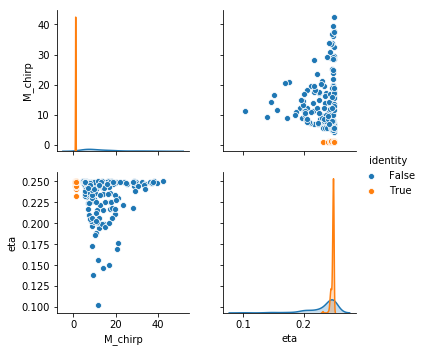

In [14]:
pairplots = sns.pairplot(datapanda,vars=['M_chirp','eta'],hue='identity',diag_kind='auto')

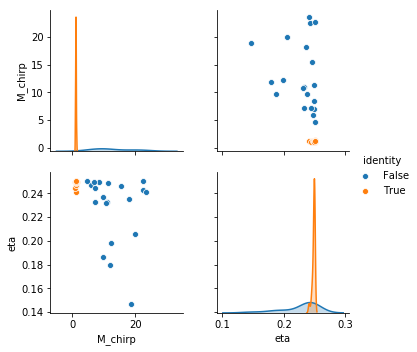

In [13]:
pairplots_check = sns.pairplot(datapanda_check,vars=['M_chirp','eta'],hue='identity',diag_kind='auto')